In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('ipl_t20(clean).csv')

In [4]:
df.sample(10)

,Match,Date,Teams,Ground,Result,Team1,Team2,Winner,Win by,Chasing Team
822,11,2021-04-18,Delhi Capitals v Punjab Kings,Mumbai,Delhi Capitals won by 6 Wickets,Delhi Capitals,Punjab Kings,Delhi Capitals,6 Wickets,Won
645,13,2018-04-16,Kolkata Knight Riders v Delhi Capitals,Kolkata,Kolkata Knight Riders won by 71 Runs,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,71 Runs,Lost
514,1,2016-04-09,Mumbai Indians v Rising Pune Supergiant,Mumbai,Rising Pune Supergiant won by 9 Wickets,Mumbai Indians,Pune Warriors,Pune Warriors,9 Wickets,Won
383,63,2013-05-14,Royal Challengers Bangalore v Punjab Kings,Bengaluru,Punjab Kings won by 7 Wickets,Royal Challengers Bangalore,Punjab Kings,Punjab Kings,7 Wickets,Won
466,10,2015-04-15,Punjab Kings v Delhi Capitals,Pune,Delhi Capitals won by 5 Wickets,Punjab Kings,Delhi Capitals,Delhi Capitals,5 Wickets,Won
774,23,2020-10-09,Delhi Capitals v Rajasthan Royals,Sharjah,Delhi Capitals won by 46 Runs,Delhi Capitals,Rajasthan Royals,Delhi Capitals,46 Runs,Lost
166,52,2010-04-17,Royal Challengers Bangalore v Mumbai Indians,Bengaluru,Mumbai Indians won by 57 Runs,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,57 Runs,Lost
712,20,2019-04-07,Royal Challengers Bangalore v Delhi Capitals,Bengaluru,Delhi Capitals won by 4 Wickets,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,4 Wickets,Won
611,39,2017-05-01,Rising Pune Supergiant v Gujarat Lions,Pune,Rising Pune Supergiant won by 5 Wickets,Pune Warriors,Gujarat Lions,Pune Warriors,5 Wickets,Won
119,5,2010-03-14,Chennai Super Kings v Deccan Chargers,Chennai,Deccan Chargers won by 31 Runs,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,31 Runs,Lost


In [5]:
ipldf = df.copy()

In [6]:
ipldf['Match'] = range(1,len(ipldf)+1)
ipldf['Match'] = ipldf['Match'].astype('int')

In [7]:
Pitch = ipldf.groupby(['Ground', 'Chasing Team']).count()[['Match']]

In [8]:
Pitch

Match
Ground         Chasing Team       
Abu Dhabi      Lost             15
               Tie               1
               Won              21
Ahmedabad      Lost              7
               Won               9
Bengaluru      Lost             32
               Tie               1
               Won              44
Bloemfontein   Lost              1
               Won               1
Cape Town      Lost              4
               Tie               1
               Won               2
Centurion      Lost              3
               Won               8
Chennai        Lost             38
               Tie               2
               Won              27
Cuttack        Lost              5
               Won               9
Delhi          Lost             33
               Tie               1
               Won              42
Dharamsala     Lost              5
               Won               4
Dubai          Lost             21
               Tie               3
               Won              22
Durban         Lost              9
               Won               6
East London    Lost              3
               Won               1
Hyderabad      Lost             26
               Tie               1
               Won              37
Indore         Lost              1
               Won               8
Jaipur         Lost             15
               Won              32
Johannesburg   Lost              2
               Won               6
Kanpur         Won               4
Khandheri      Lost              3
               Tie               1
               Won               6
Kimberley      Lost              1
               Won               2
Kochi          Lost              3
               Won               2
Kolkata        Lost             32
               Won              44
Mohali         Lost             23
               Won              32
Mumbai         Lost             51
               Tie               1
               Won              56
Nagpur         Lost              2
               Won               1
Port Elizabeth Lost              3
               Won               4
Pune           Lost             17
               Won              21
Raipur         Lost              2
               Won               4
Ranchi         Lost              2
               Won               5
Sharjah        Lost             10
               Won              18
Visakhapatnam  Lost              7
               Won               6

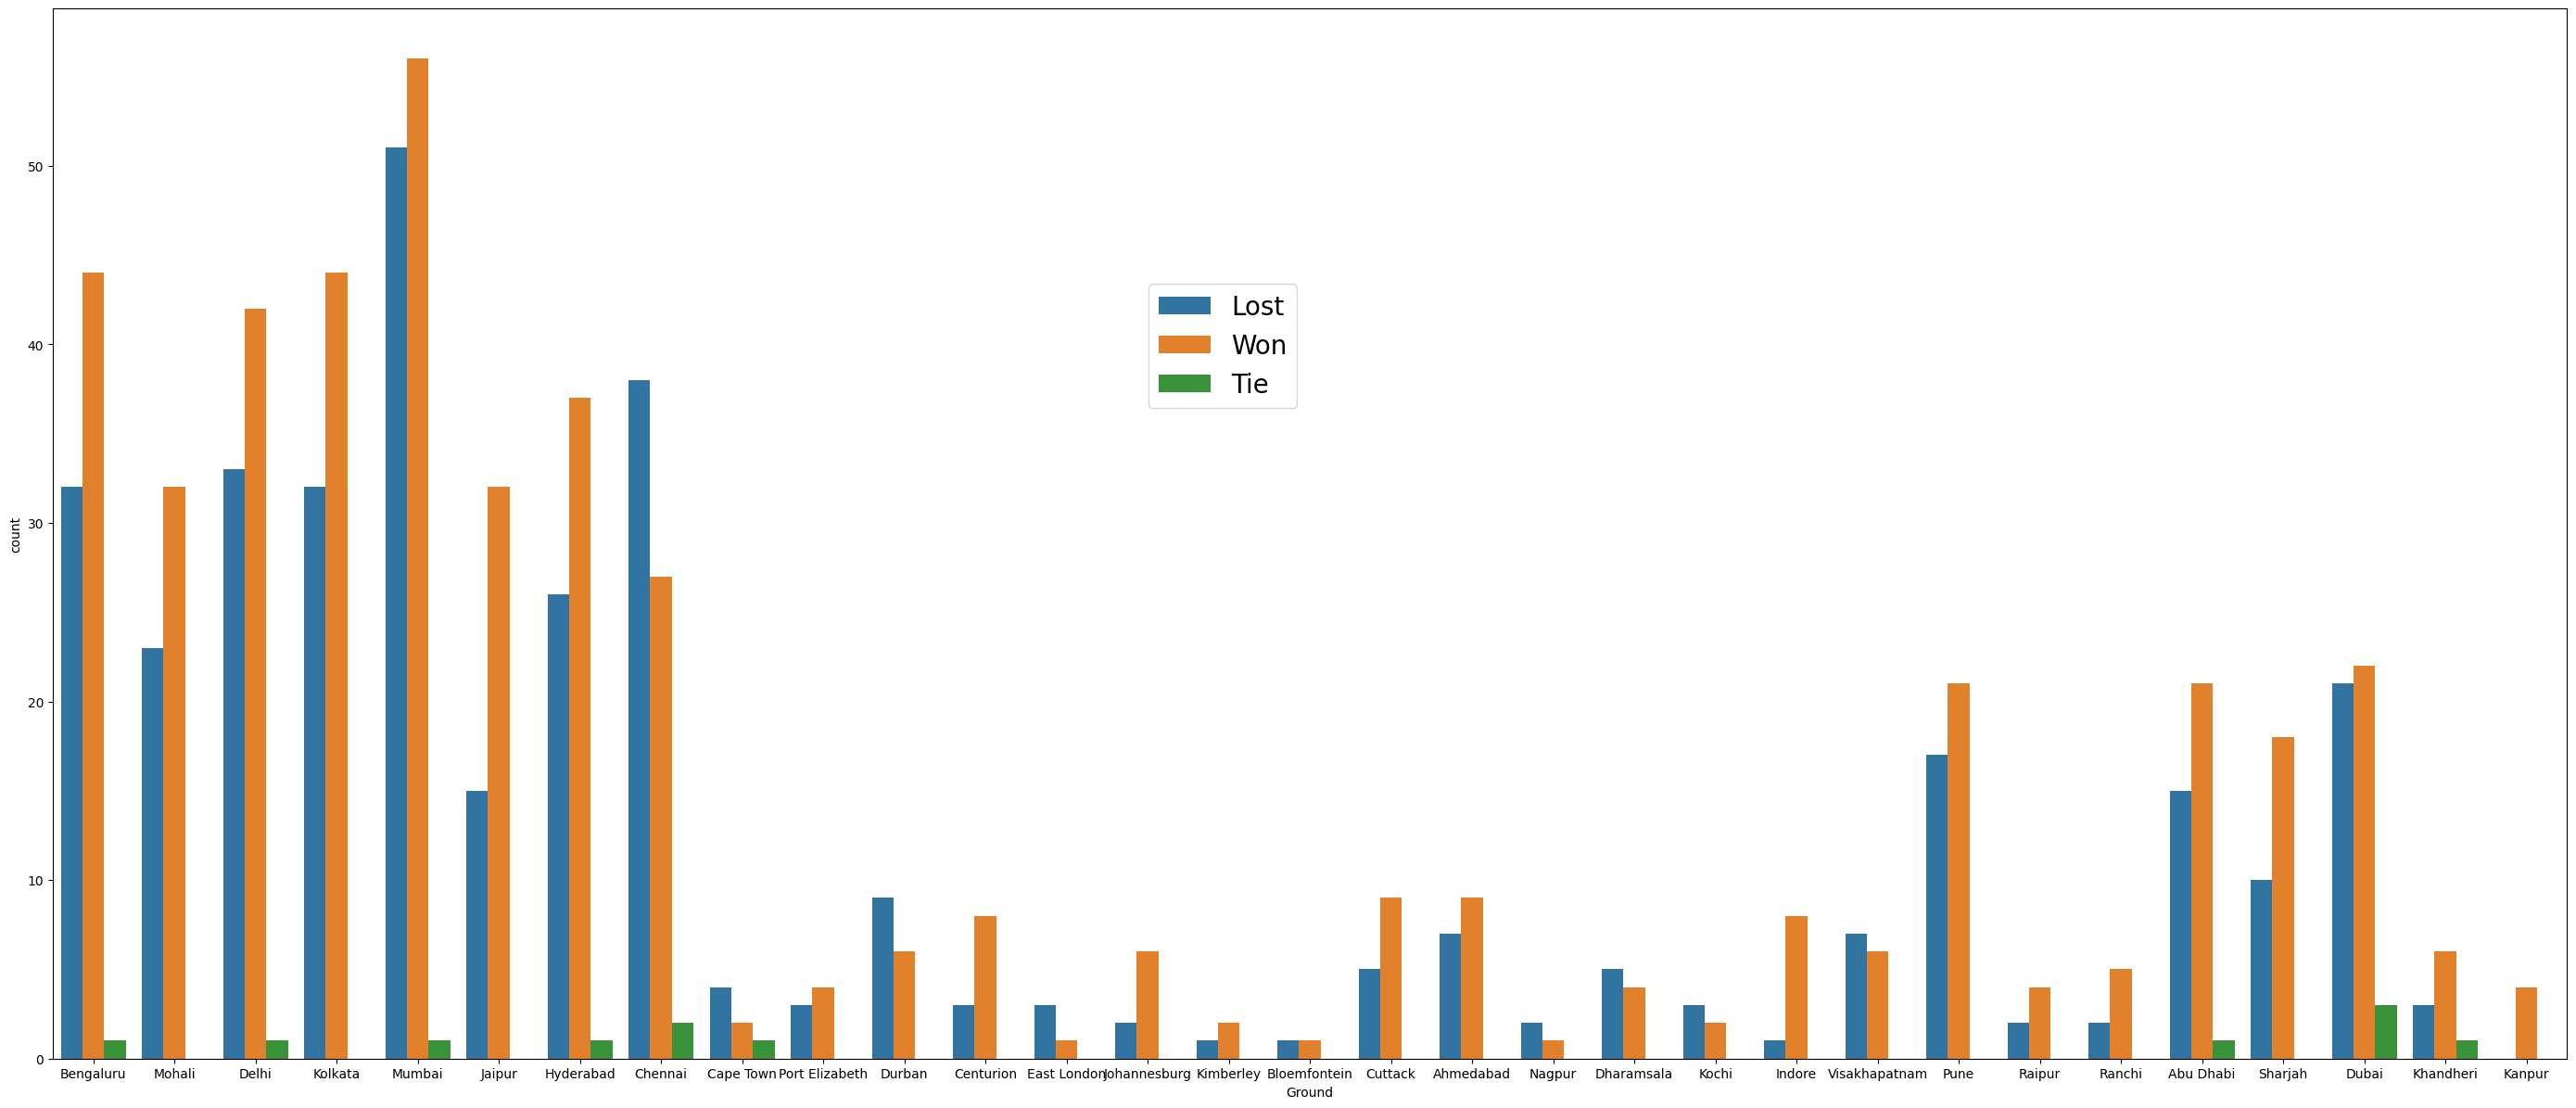

In [9]:
plt.figure(figsize = (35,15), dpi = 100)
sns.countplot(x = 'Ground', hue = 'Chasing Team', data = ipldf)
plt.legend(fontsize = 20, bbox_to_anchor = (0.5,0.75))
plt.show()

In [10]:
Chennai = Pitch.loc['Chennai'].reset_index()

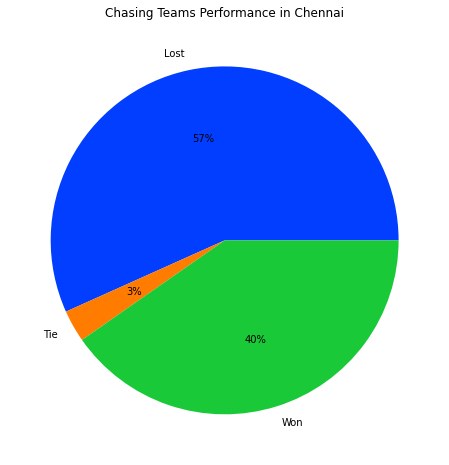

In [11]:
plt.figure(figsize = (8,8))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(Chennai['Match'], labels = Chennai['Chasing Team'], colors=palette_color, autopct='%.0f%%')
plt.title('Chasing Teams Performance in Chennai')
plt.show()

In [12]:
Bengaluru = Pitch.loc['Bengaluru'].reset_index()

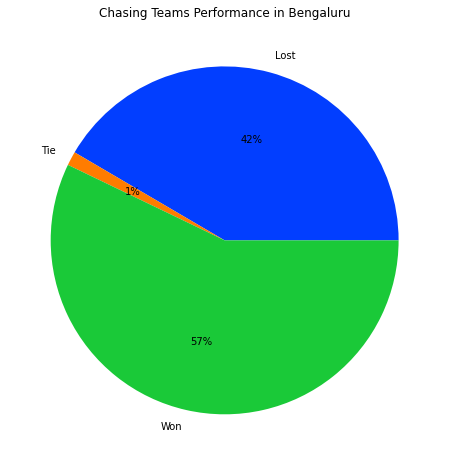

In [13]:
plt.figure(figsize = (8,8))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(Bengaluru['Match'], labels = Bengaluru['Chasing Team'], colors=palette_color, autopct='%.0f%%')
plt.title('Chasing Teams Performance in Bengaluru')
plt.show()

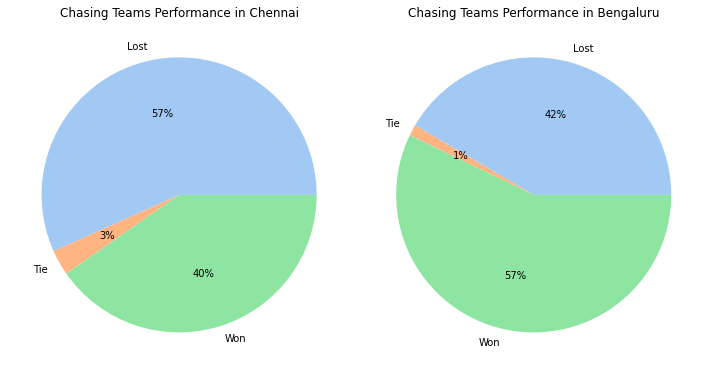

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7))
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
axes[0].pie(Chennai['Match'], labels = Chennai['Chasing Team'], colors=palette_color, autopct='%.0f%%')
axes[0].set_title('Chasing Teams Performance in Chennai')
axes[1].pie(Bengaluru['Match'], labels = Bengaluru['Chasing Team'], colors=palette_color, autopct='%.0f%%')
axes[1].set_title('Chasing Teams Performance in Bengaluru')
plt.tight_layout()
plt.show()

In [15]:
Chasing_grnd = Pitch.xs(key = 'Won' , level = 'Chasing Team').sort_values(by = 'Match', ascending = False)

In [16]:
Chasing_grnd = Chasing_grnd.reset_index()

In [17]:
Chasing_grnd.shape

(31, 2)

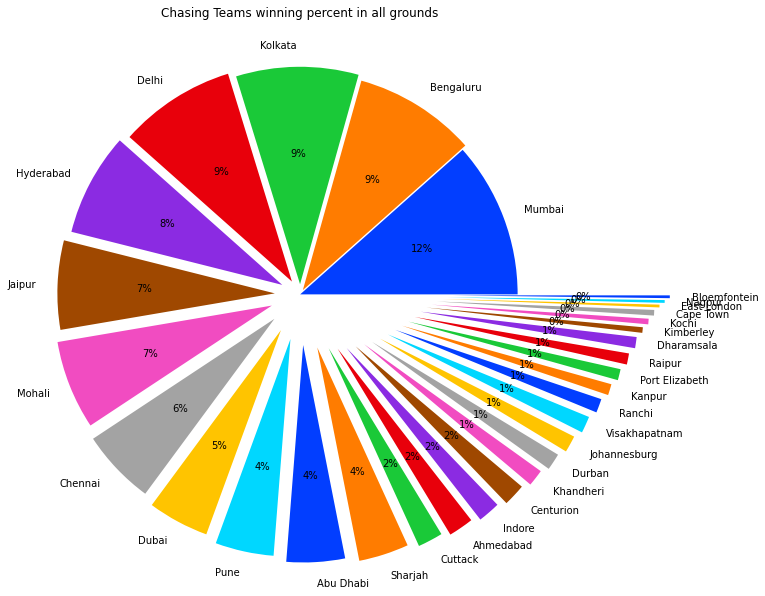

In [18]:
plt.figure(figsize = (10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
explode = np.linspace(0,0.7,31)
# plotting data on chart
plt.pie(Chasing_grnd['Match'], labels = Chasing_grnd['Ground'], colors=palette_color, autopct='%.0f%%', explode = explode)
plt.title('Chasing Teams winning percent in all grounds')
plt.show()

In [19]:
NonChasing_grnd = Pitch.xs(key = 'Lost' , level = 'Chasing Team').sort_values(by = 'Match', ascending = False)

In [20]:
NonChasing_grnd.shape

(30, 1)

In [21]:
NonChasing_grnd = NonChasing_grnd.reset_index()

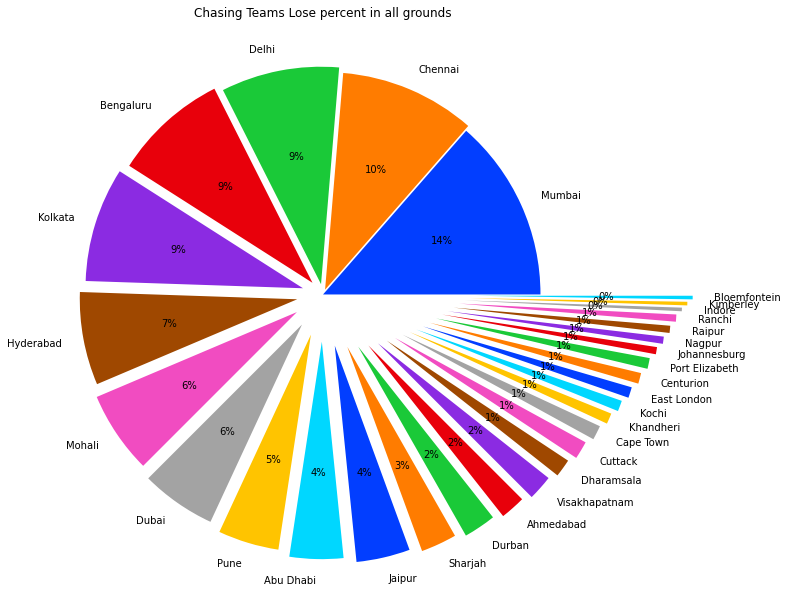

In [22]:
plt.figure(figsize = (10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
explode = np.linspace(0,0.7,30)
# plotting data on chart
plt.pie(NonChasing_grnd['Match'], labels = NonChasing_grnd['Ground'], colors=palette_color, autopct='%.0f%%', explode = explode)
plt.title('Chasing Teams Lose percent in all grounds')
plt.show()

In [23]:
ipldf.groupby(['Winner','Ground']).count()[['Win by']]

Win by
Winner                      Ground                
Chennai Super Kings         Abu Dhabi            4
                            Bengaluru            5
                            Centurion            1
                            Chennai             40
                            Delhi                7
                            Dharamsala           1
                            Dubai                9
                            Durban               1
                            East London          2
                            Hyderabad            3
                            Jaipur               3
                            Johannesburg         1
                            Kimberley            1
                            Kolkata              5
                            Mohali               3
                            Mumbai              15
                            Port Elizabeth       2
                            Pune                 6
                            Ranchi               3
                            Sharjah              3
                            Visakhapatnam        2
Delhi Capitals              Abu Dhabi            3
                            Ahmedabad            2
                            Bengaluru            5
                            Bloemfontein         1
                            Cape Town            1
                            Centurion            2
                            Chennai              3
                            Cuttack              1
                            Delhi               30
                            Dharamsala           1
                            Dubai                6
                            Durban               3
                            East London          1
                            Hyderabad            5
                            Jaipur               2
                            Johannesburg         1
                            Kanpur               1
                            Khandheri            1
                            Kochi                1
                            Kolkata              2
                            Mohali               1
                            Mumbai               6
                            Port Elizabeth       1
                            Pune                 3
                            Raipur               4
                            Sharjah              5
                            Visakhapatnam        2
Gujarat Lions               Bengaluru            1
                            Delhi                1
                            Kanpur               2
                            Khandheri            3
                            Kolkata              2
                            Mohali               2
                            Mumbai               1
                            Pune                 1
Kochi Tuskers Kerala        Cuttack              1
                            Delhi                1
                            Indore               1
                            Kochi                2
                            Kolkata              1
Kolkata Knight Riders       Abu Dhabi            7
                            Ahmedabad            1
                            Bengaluru            8
                            Centurion            1
                            Chennai              3
                            Cuttack              4
                            Delhi                6
                            Dubai                3
                            Durban               2
                            Hyderabad            5
                            Indore               1
                            Jaipur               3
                            Khandheri            1
                            Kolkata             44
                            Mohali               4
                            Mumbai               3
               

In [24]:
teamngrnd = ipldf.groupby(['Winner','Ground']).count()[['Win by']]

In [25]:
csk = teamngrnd.loc['Chennai Super Kings']

In [26]:
csk = csk.reset_index().sort_values('Win by', ascending = False)

In [27]:
csk.shape

(21, 2)

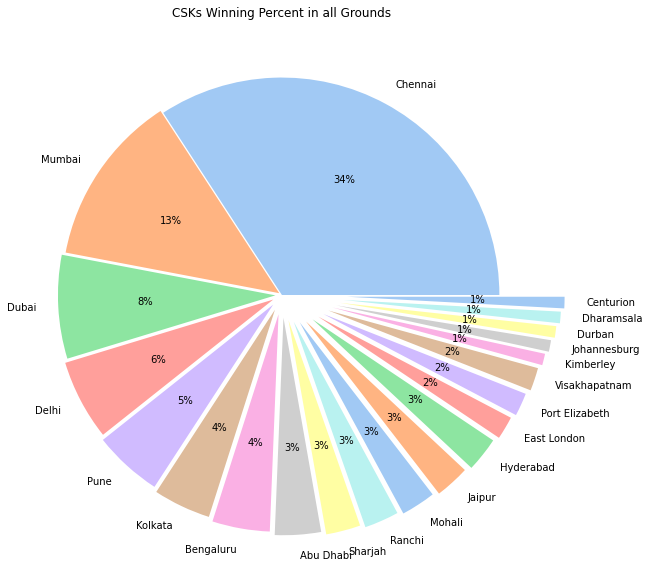

In [28]:
plt.figure(figsize = (10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
explode = np.linspace(0,0.3,21)
# plotting data on chart
plt.pie(csk['Win by'], labels = csk['Ground'], colors=palette_color, autopct='%.0f%%', explode = explode)
plt.title('CSKs Winning Percent in all Grounds')
plt.show()

In [29]:
teamngrnd.xs(key = 'Chennai', level = 'Ground')

,Win by
Winner,
Chennai Super Kings,40
Delhi Capitals,3
Kolkata Knight Riders,3
Mumbai Indians,7
Pune Warriors,1
Punjab Kings,3
Rajasthan Royals,1
Royal Challengers Bangalore,5
Sunrisers Hyderabad,4


In [30]:
Chennai_grnd = teamngrnd.xs(key = 'Chennai', level = 'Ground').reset_index()

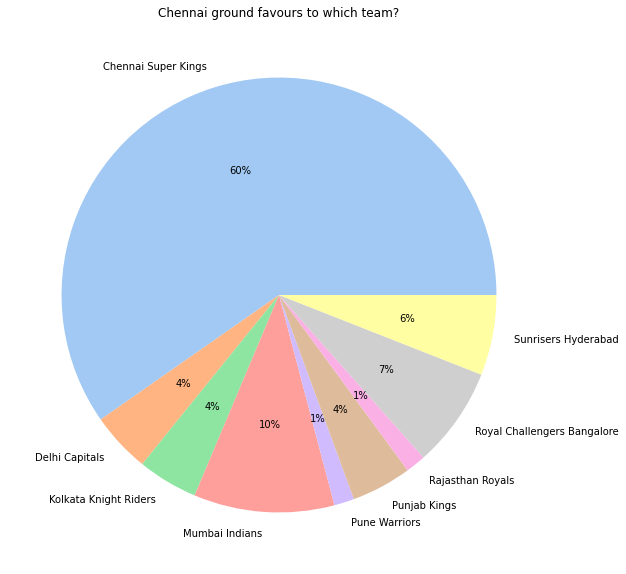

In [31]:
plt.figure(figsize = (10,10))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
#explode = np.linspace(0,0.4,9)
# plotting data on chart
plt.pie(Chennai_grnd['Win by'], labels = Chennai_grnd['Winner'], colors=palette_color, autopct='%.0f%%')
plt.title('Chennai ground favours to which team?')
plt.show()

In [32]:
ipldf.head(3)

,Match,Date,Teams,Ground,Result,Team1,Team2,Winner,Win by,Chasing Team
0,1,2008-04-18,Royal Challengers Bangalore v Kolkata Knight R...,Bengaluru,Kolkata Knight Riders won by 140 Runs,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140 Runs,Lost
1,2,2008-04-19,Punjab Kings v Chennai Super Kings,Mohali,Chennai Super Kings won by 33 Runs,Punjab Kings,Chennai Super Kings,Chennai Super Kings,33 Runs,Lost
2,3,2008-04-19,Delhi Capitals v Rajasthan Royals,Delhi,Delhi Capitals won by 9 Wickets,Delhi Capitals,Rajasthan Royals,Delhi Capitals,9 Wickets,Won


In [33]:
csk_matches = ipldf[(ipldf['Team1'] == 'Chennai Super Kings') | (ipldf['Team2'] == 'Chennai Super Kings')][['Team1','Team2','Winner']]
csk_matches

,Team1,Team2,Winner
1,Punjab Kings,Chennai Super Kings,Chennai Super Kings
7,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
10,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings
14,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings
19,Chennai Super Kings,Delhi Capitals,Delhi Capitals
23,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals
25,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad
27,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
30,Chennai Super Kings,Punjab Kings,Chennai Super Kings
35,Mumbai Indians,Chennai Super Kings,Mumbai Indians


In [34]:
len(csk_matches)

194

In [35]:
csk_won = csk_matches[csk_matches['Winner'] == 'Chennai Super Kings'][['Team1','Team2','Winner']]
csk_won

,Team1,Team2,Winner
1,Punjab Kings,Chennai Super Kings,Chennai Super Kings
7,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
10,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings
14,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings
27,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
30,Chennai Super Kings,Punjab Kings,Chennai Super Kings
40,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
52,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings
56,Punjab Kings,Chennai Super Kings,Chennai Super Kings
62,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings


In [36]:
len(csk_won)

117

In [37]:
csk_lost = csk_matches[csk_matches['Winner'] != 'Chennai Super Kings'][['Team1','Team2','Winner']]
csk_lost

,Team1,Team2,Winner
19,Chennai Super Kings,Delhi Capitals,Delhi Capitals
23,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals
25,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad
35,Mumbai Indians,Chennai Super Kings,Mumbai Indians
45,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore
47,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
57,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
58,Chennai Super Kings,Mumbai Indians,Mumbai Indians
66,Chennai Super Kings,Delhi Capitals,Delhi Capitals
71,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad


In [38]:
len(csk_lost)

77

In [39]:
winpercent = (len(csk_won)/len(csk_matches))*100
winpercent

60.30927835051546

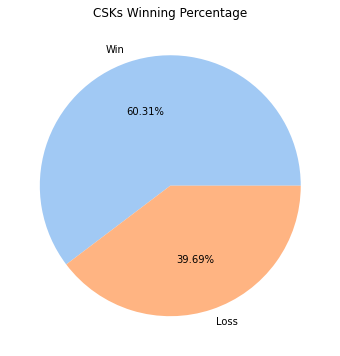

In [40]:
plt.figure(figsize = (6,6))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
#explode = np.linspace(0,0.4,9)
# plotting data on chart
plt.pie([len(csk_won), len(csk_lost)], labels = ['Win', 'Loss'], colors=palette_color, autopct='%.2f%%')
plt.title('CSKs Winning Percentage')
plt.show()

In [41]:
csk_lost['Winner'].value_counts()     # CSK's toughest competitor is Mumbai Indians

Mumbai Indians                 19
Delhi Capitals                 10
Rajasthan Royals               10
Punjab Kings                   10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kolkata Knight Riders           8
Pune Warriors                   2
Kochi Tuskers Kerala            1
Name: Winner, dtype: int64

In [42]:
#lets check Mumbai Indians winning percent
mumbai_matches = ipldf[(ipldf['Team1'] == 'Mumbai Indians') | (ipldf['Team2'] == 'Mumbai Indians')][['Team1','Team2','Winner']]
mumbai_matches

,Team1,Team2,Winner
4,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
7,Chennai Super Kings,Mumbai Indians,Chennai Super Kings
9,Punjab Kings,Mumbai Indians,Punjab Kings
13,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad
15,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
22,Mumbai Indians,Delhi Capitals,Mumbai Indians
26,Mumbai Indians,Rajasthan Royals,Mumbai Indians
35,Mumbai Indians,Chennai Super Kings,Mumbai Indians
37,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians
41,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians


In [43]:
len(mumbai_matches)

217

In [44]:
mumbai_won = mumbai_matches[mumbai_matches['Winner'] == 'Mumbai Indians'][['Team1','Team2','Winner']]
mumbai_won

,Team1,Team2,Winner
15,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
22,Mumbai Indians,Delhi Capitals,Mumbai Indians
26,Mumbai Indians,Rajasthan Royals,Mumbai Indians
35,Mumbai Indians,Chennai Super Kings,Mumbai Indians
37,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians
41,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians
53,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians
58,Chennai Super Kings,Mumbai Indians,Mumbai Indians
72,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
78,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians


In [45]:
len(mumbai_won)

127

In [46]:
mumbai_lost = mumbai_matches[mumbai_matches['Winner'] != 'Mumbai Indians'][['Team1','Team2','Winner']]
len(mumbai_lost)

90

In [47]:
mumwinpercent = (len(mumbai_won)/len(mumbai_matches))*100
mumwinpercent

58.525345622119815

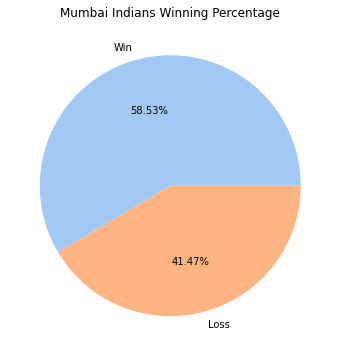

In [48]:
plt.figure(figsize = (6,6))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
#explode = np.linspace(0,0.4,9)
# plotting data on chart
plt.pie([len(mumbai_won), len(mumbai_lost)], labels = ['Win', 'Loss'], colors=palette_color, autopct='%.2f%%')
plt.title('Mumbai Indians Winning Percentage')
plt.show()

In [49]:
csk_win = ipldf[ipldf['Winner'] == 'Chennai Super Kings'][['Winner', 'Win by']]
len(csk_win)

117

In [50]:
csk_chase = csk_win[csk_win['Win by'].str.split().str[-1] == 'Wickets']
len(csk_chase)

58

In [51]:
csk_ntchase = csk_win[csk_win['Win by'].str.split().str[-1] != 'Wickets']
len(csk_ntchase)

59

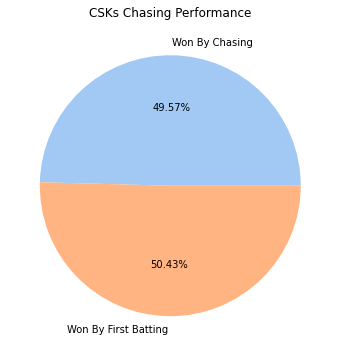

In [52]:
plt.figure(figsize = (6,6))
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
#explode = np.linspace(0,0.4,9)
# plotting data on chart
plt.pie([len(csk_chase), len(csk_ntchase)], labels = ['Won By Chasing', 'Won By First Batting'], colors=palette_color, autopct='%.2f%%')
plt.title('CSKs Chasing Performance')
plt.show()

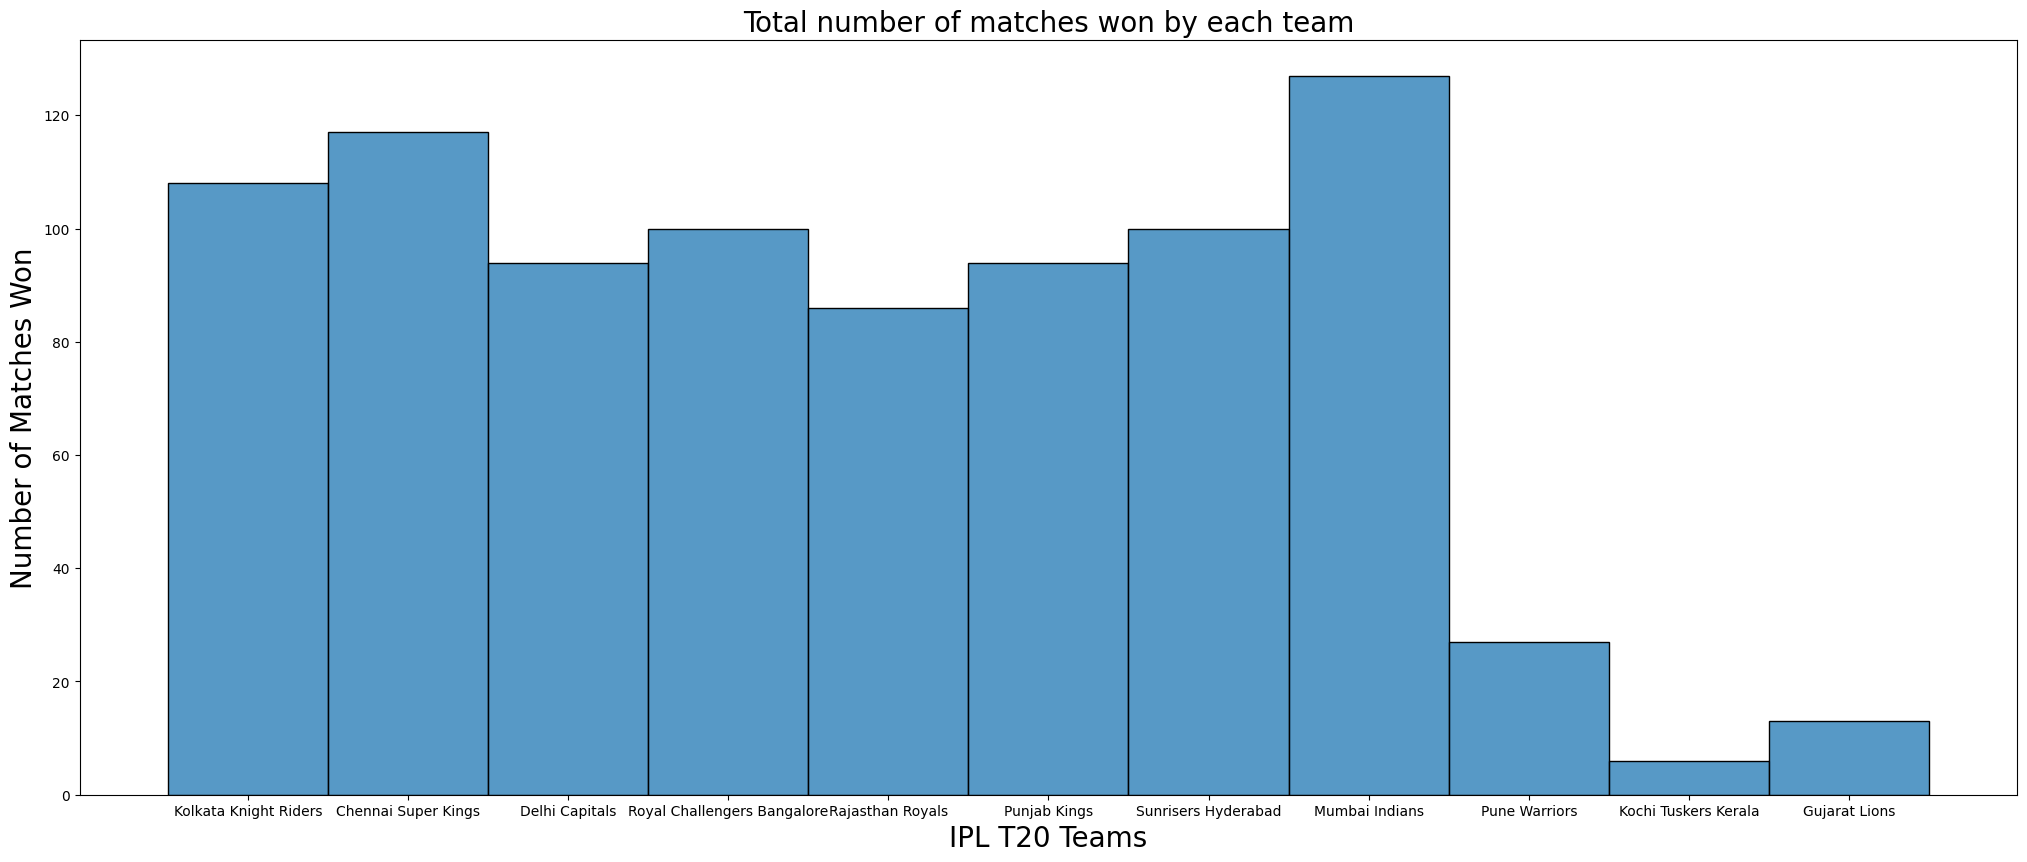

In [53]:
plt.figure(figsize=(25,10), dpi = 100)
h = sns.histplot(ipldf['Winner'], bins = 15, binwidth = 10, legend = 'auto')
h.set_xlabel('IPL T20 Teams', fontsize = 20)
h. set_ylabel('Number of Matches Won', fontsize = 20)
h.set_title('Total number of matches won by each team', fontsize = 20)

plt.show()

In [54]:
cskmatches = ipldf[(ipldf['Team1'] == 'Chennai Super Kings') | (ipldf['Team2'] == 'Chennai Super Kings')][['Match', 'Date', 'Ground', 'Team1','Team2','Winner', 'Win by']]
cskmatches.head()

,Match,Date,Ground,Team1,Team2,Winner,Win by
1,2,2008-04-19,Mohali,Punjab Kings,Chennai Super Kings,Chennai Super Kings,33 Runs
7,8,2008-04-23,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,6 Runs
10,11,2008-04-26,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,9 Wickets
14,15,2008-04-28,Bengaluru,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,13 Runs
19,20,2008-05-02,Chennai,Chennai Super Kings,Delhi Capitals,Delhi Capitals,8 Wickets


In [55]:
cskmatches.shape

(194, 7)

In [56]:
cskmatches.index = range(len(cskmatches))

In [57]:
def opponent(row):
    if row['Team1'] != 'Chennai Super Kings':
        return row['Team1']
    else:
        return row['Team2']

In [58]:
cskmatches['Opponent'] = cskmatches.apply(opponent, axis = 1)

In [59]:
cskmatches.head()

,Match,Date,Ground,Team1,Team2,Winner,Win by,Opponent
0,2,2008-04-19,Mohali,Punjab Kings,Chennai Super Kings,Chennai Super Kings,33 Runs,Punjab Kings
1,8,2008-04-23,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,6 Runs,Mumbai Indians
2,11,2008-04-26,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,9 Wickets,Kolkata Knight Riders
3,15,2008-04-28,Bengaluru,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,13 Runs,Royal Challengers Bangalore
4,20,2008-05-02,Chennai,Chennai Super Kings,Delhi Capitals,Delhi Capitals,8 Wickets,Delhi Capitals


In [60]:
cskmatches['Opponent'].unique()

array(['Punjab Kings', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [61]:
def chase(df):
    if ('Runs' in df['Win by']) or ('Boundary Count' in df['Win by']):
        return '1st Batting'
    elif 'tie' in df['Win by']:
        return 'Tie'
    else:
        return 'Chasing'

In [62]:
cskmatches['Win by'] = cskmatches.apply(chase, axis = 1)

In [63]:
cskmatches['Win by'].unique()

array(['1st Batting', 'Chasing', 'Tie'], dtype=object)

### TOI Sports Survey:
1. Mumbai Indians.
2. Chennai Super Kings.
3. Kolkata Knight Riders.
4. Royal Challengers Bangalore.
5. Delhi Capitals.
6. Punjab Kings.
7. Rajasthan Royals.
8. Sunrisers Hyderabad.
9. Pune Warriors.
10. Kochi Tuskers Kerala.

In [64]:
ToughOpp = cskmatches[cskmatches['Winner'] != 'Chennai Super Kings']['Opponent'].value_counts()
ToughOpp

Mumbai Indians                 19
Delhi Capitals                 10
Rajasthan Royals               10
Punjab Kings                   10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kolkata Knight Riders           8
Pune Warriors                   2
Kochi Tuskers Kerala            1
Name: Opponent, dtype: int64

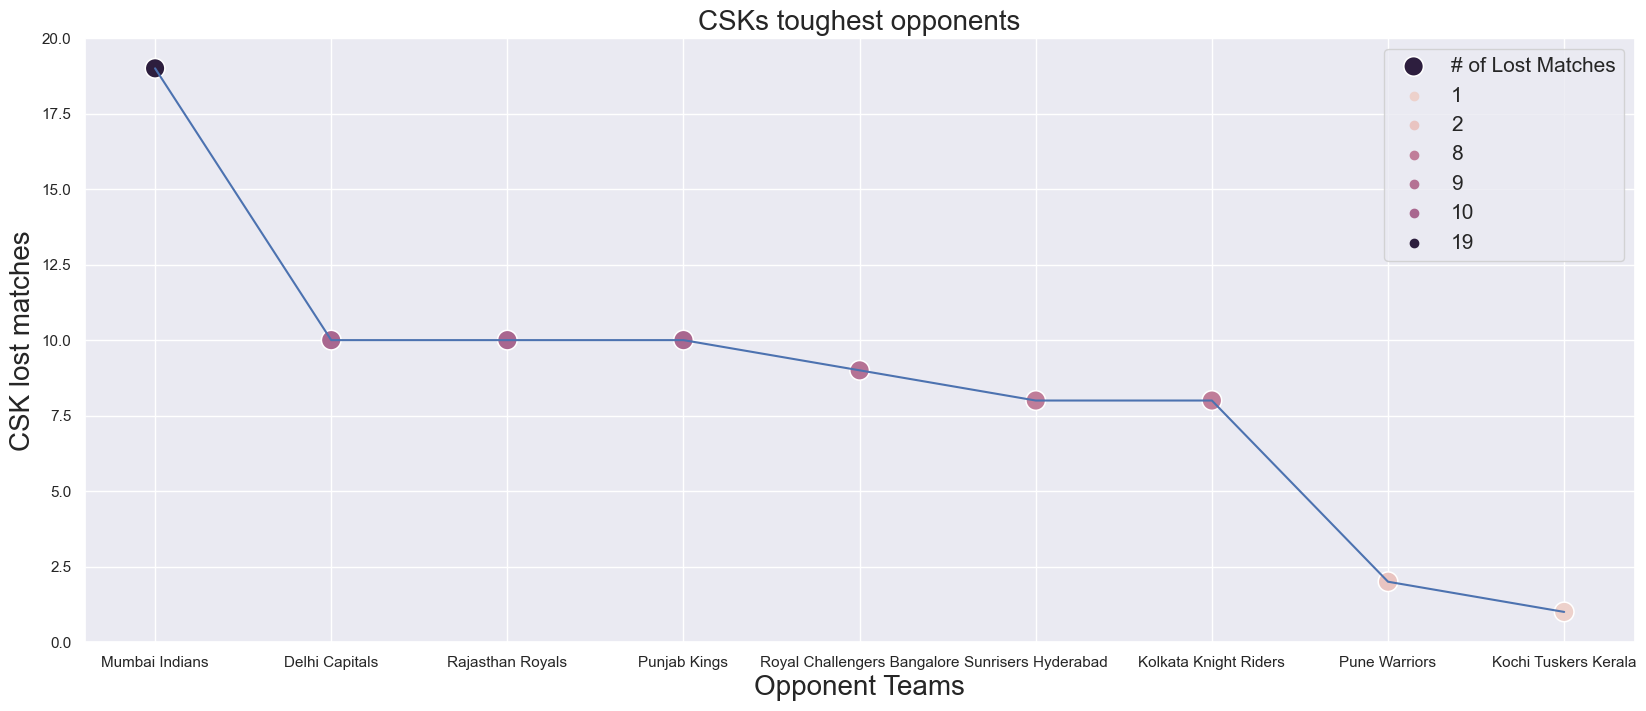

In [65]:
plt.figure(figsize = (20,8), dpi = 100)
sns.set(style = 'darkgrid')
sns.scatterplot(data = ToughOpp, x = ToughOpp.index, y = ToughOpp.values, hue = ToughOpp.values, s = 200, label = '# of Lost Matches')
sns.lineplot(data = ToughOpp, x = ToughOpp.index, y = ToughOpp.values);
plt.xlabel('Opponent Teams', fontsize = 20)
plt.ylabel('CSK lost matches', fontsize = 20)
plt.ylim(0,20)
plt.title('CSKs toughest opponents', fontsize = 20)
plt.legend(fontsize = 15)

In [66]:
EasyOpp = cskmatches[cskmatches['Winner'] == 'Chennai Super Kings']['Opponent'].value_counts()
EasyOpp

Royal Challengers Bangalore    18
Sunrisers Hyderabad            18
Kolkata Knight Riders          17
Delhi Capitals                 16
Punjab Kings                   15
Rajasthan Royals               15
Mumbai Indians                 13
Pune Warriors                   4
Kochi Tuskers Kerala            1
Name: Opponent, dtype: int64

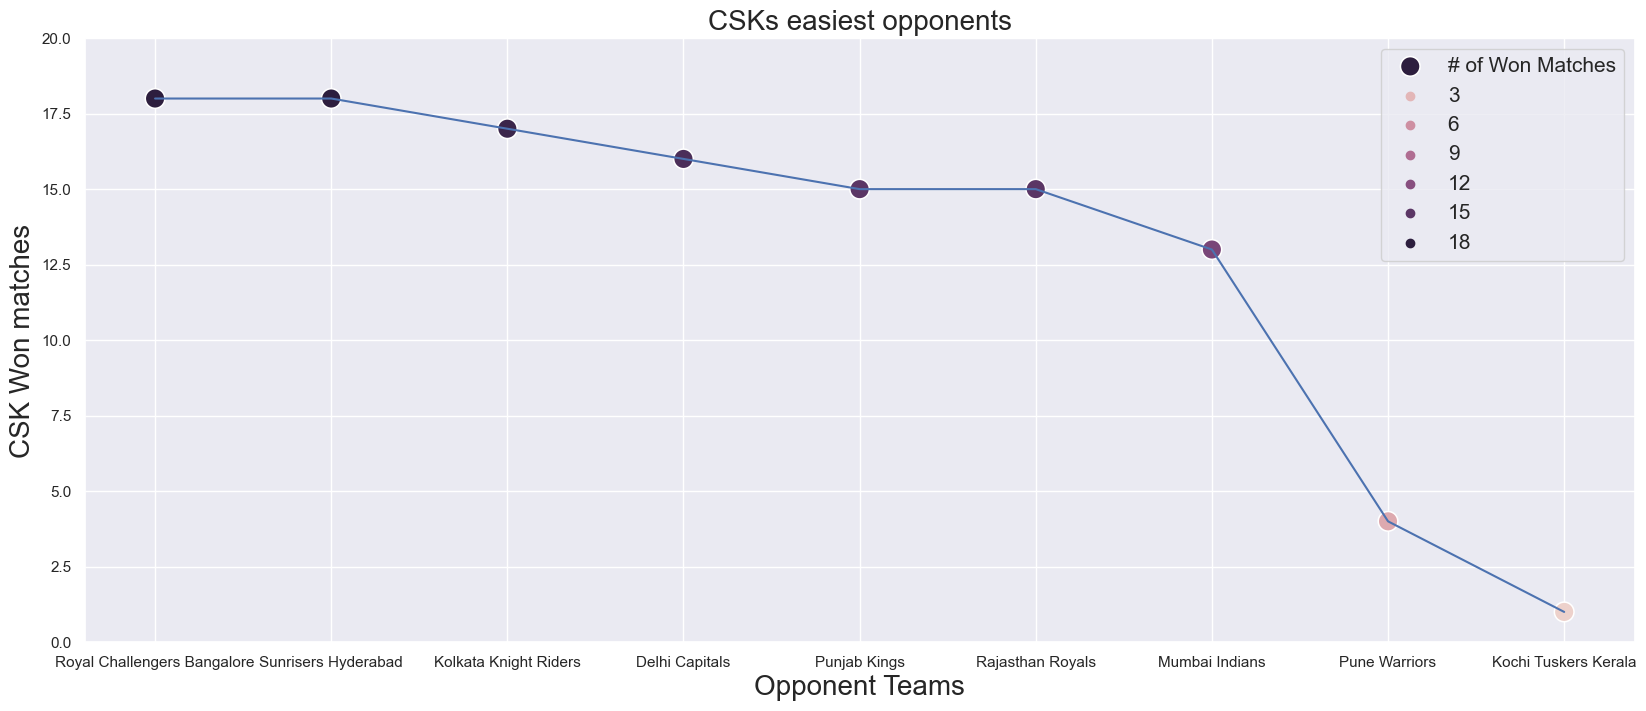

In [67]:
plt.figure(figsize = (20,8), dpi = 100)
sns.set(style = 'darkgrid')
sns.scatterplot(data = EasyOpp, x = EasyOpp.index, y = EasyOpp.values, hue = EasyOpp.values, s = 200, label = '# of Won Matches')
sns.lineplot(data = EasyOpp, x = EasyOpp.index, y = EasyOpp.values);
plt.xlabel('Opponent Teams', fontsize = 20)
plt.ylabel('CSK Won matches', fontsize = 20)
plt.ylim(0,20)
plt.title('CSKs easiest opponents', fontsize = 20)
plt.legend(fontsize = 15);

In [68]:
cskmatches['Date'] = pd.to_datetime(cskmatches['Date'])

In [69]:
cskmatches['Day'] = cskmatches['Date'].dt.day_name()

In [70]:
cskmatches.head(3)

,Match,Date,Ground,Team1,Team2,Winner,Win by,Opponent,Day
0,2,2008-04-19,Mohali,Punjab Kings,Chennai Super Kings,Chennai Super Kings,1st Batting,Punjab Kings,Saturday
1,8,2008-04-23,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,1st Batting,Mumbai Indians,Wednesday
2,11,2008-04-26,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Chasing,Kolkata Knight Riders,Saturday


In [71]:
cskmatches[cskmatches['Winner'] == 'Chennai Super Kings']['Day'].value_counts()

Saturday     25
Sunday       20
Wednesday    16
Tuesday      16
Thursday     15
Friday       13
Monday       12
Name: Day, dtype: int64

In [72]:
cskmatches[cskmatches['Winner'] != 'Chennai Super Kings']['Day'].value_counts()

Sunday       18
Saturday     16
Friday       11
Thursday      9
Tuesday       8
Wednesday     8
Monday        7
Name: Day, dtype: int64

In [73]:
cskmatches[cskmatches['Winner'] != 'Chennai Super Kings']['Ground'].value_counts()

Chennai         16
Mumbai          10
Kolkata          6
Dubai            5
Bengaluru        4
Abu Dhabi        4
Durban           3
Jaipur           3
Sharjah          3
Hyderabad        3
Delhi            3
Mohali           3
Pune             2
Ranchi           2
Ahmedabad        2
Cape Town        1
Centurion        1
Dharamsala       1
Nagpur           1
Cuttack          1
Raipur           1
Johannesburg     1
Kochi            1
Name: Ground, dtype: int64

In [74]:
DayVsGrnd = cskmatches.groupby(['Ground', 'Day']).count()['Winner']

In [75]:
DayVsGrnd.xs(key = 'Saturday', level = 'Day').sort_values(ascending = False)

Ground
Chennai           15
Mumbai             4
Pune               3
Abu Dhabi          2
Johannesburg       2
Bengaluru          2
Kolkata            2
Mohali             2
Sharjah            1
Port Elizabeth     1
Nagpur             1
Kimberley          1
Hyderabad          1
Dubai              1
Delhi              1
Cape Town          1
Visakhapatnam      1
Name: Winner, dtype: int64

In [76]:
DayVsGrnd.xs(key = 'Sunday', level = 'Day').sort_values(ascending = False)

Ground
Chennai       7
Mumbai        6
Dubai         4
Kolkata       4
Abu Dhabi     2
Ahmedabad     2
Bengaluru     2
Hyderabad     2
Jaipur        2
Mohali        2
Pune          2
Dharamsala    1
Ranchi        1
Sharjah       1
Name: Winner, dtype: int64

In [77]:
pd.pivot(DayVsGrnd.reset_index(), index = 'Day', columns = 'Ground', values = 'Winner')

Ground,Abu Dhabi,Ahmedabad,Bengaluru,Cape Town,Centurion,Chennai,Cuttack,Delhi,Dharamsala,Dubai,...,Kolkata,Mohali,Mumbai,Nagpur,Port Elizabeth,Pune,Raipur,Ranchi,Sharjah,Visakhapatnam
Day,,,,,,,,,,,,,,,,,,,,,
Friday,1.0,NaN,NaN,NaN,NaN,6.0,NaN,2.0,NaN,4.0,...,NaN,NaN,4.0,NaN,NaN,1.0,NaN,2.0,2.0,1.0
Monday,2.0,NaN,1.0,NaN,1.0,5.0,NaN,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
Saturday,2.0,NaN,2.0,1.0,NaN,15.0,NaN,1.0,NaN,1.0,...,2.0,2.0,4.0,1.0,1.0,3.0,NaN,NaN,1.0,1.0
Sunday,2.0,2.0,2.0,NaN,NaN,7.0,NaN,NaN,1.0,4.0,...,4.0,2.0,6.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN
Thursday,NaN,NaN,NaN,NaN,1.0,7.0,NaN,2.0,1.0,2.0,...,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Tuesday,NaN,NaN,1.0,NaN,NaN,9.0,NaN,3.0,NaN,1.0,...,2.0,NaN,3.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN
Wednesday,1.0,NaN,3.0,NaN,NaN,7.0,1.0,1.0,NaN,1.0,...,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
def winrlose(row):
    if row['Winner'] == 'Chennai Super Kings':
        return 1
    else:
        return 0

In [79]:
cskmatches['csk'] = cskmatches.apply(winrlose, axis=1)

In [80]:
cskmatches.head(3)

,Match,Date,Ground,Team1,Team2,Winner,Win by,Opponent,Day,csk
0,2,2008-04-19,Mohali,Punjab Kings,Chennai Super Kings,Chennai Super Kings,1st Batting,Punjab Kings,Saturday,1
1,8,2008-04-23,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,1st Batting,Mumbai Indians,Wednesday,1
2,11,2008-04-26,Chennai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,Chasing,Kolkata Knight Riders,Saturday,1


In [81]:
len(cskmatches['Match'])

194

In [82]:
x = np.arange(1, len(cskmatches['Match'])+1)

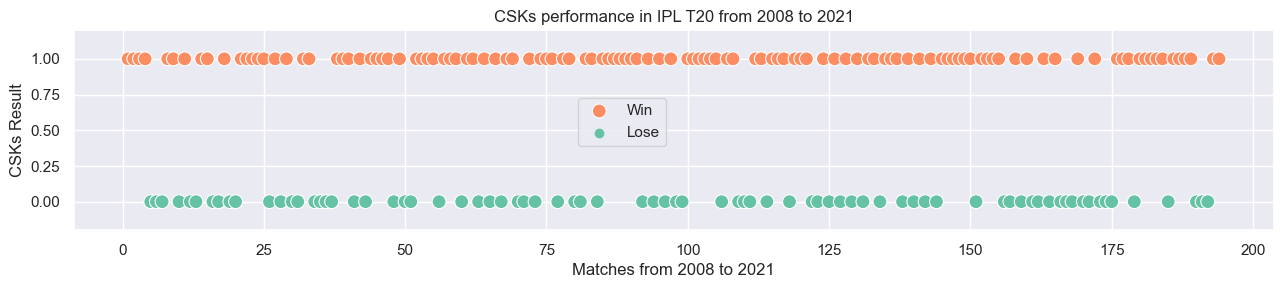

In [83]:
fig = plt.figure(figsize = (12,2), dpi = 100)
ax = fig.add_axes([0,0,1,1])
#ax.plot(x, cskmatches['csk'], color = 'purple', lw = 2)
sns.scatterplot(x=x, y = cskmatches['csk'], hue = cskmatches['csk'], s=100, palette = 'Set2', legend = 'auto', ax = ax)
ax.set_xlabel('Matches from 2008 to 2021')
ax.set_ylabel('CSKs Result')
ax.set_ylim(-0.2, 1.2)
ax.set_title('CSKs performance in IPL T20 from 2008 to 2021')
plt.legend(['Win','Lose'], bbox_to_anchor = (0.5,0.7));

In [84]:
np.array(cskmatches['Day'].unique())

array(['Saturday', 'Wednesday', 'Monday', 'Friday', 'Sunday', 'Tuesday',
       'Thursday'], dtype=object)

In [85]:
y1 = np.array([25, 16, 12, 13, 20, 16, 15])
y2 = np.array([16, 8, 7, 11, 18, 8, 9])

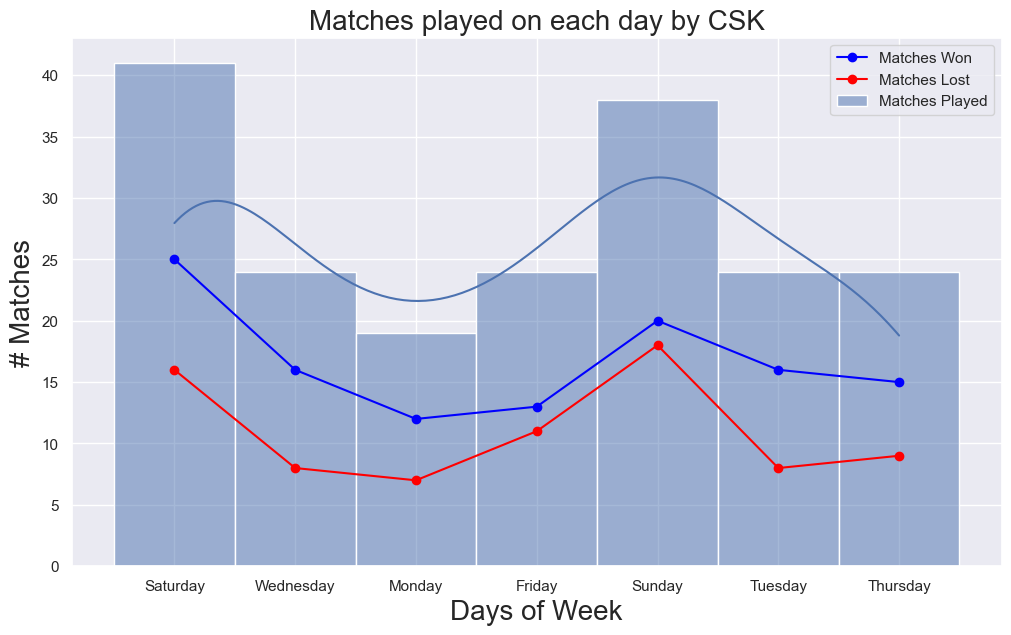

In [86]:
plt.figure(figsize=(12,7), dpi = 100)
h1 = sns.histplot(cskmatches['Day'], label = 'Matches Played', kde = True)
h1.set_xlabel('Days of Week', fontsize = 20)
h1.set_ylabel('# Matches', fontsize = 20)
h1.set_title('Matches played on each day by CSK', fontsize = 20)
h2 = plt.plot(cskmatches['Day'].unique(), y1, color = 'blue', marker = 'o',label = 'Matches Won')
h3 = plt.plot(cskmatches['Day'].unique(), y2, color = 'red', marker = 'o', label = 'Matches Lost')
plt.legend()
plt.show()

<AxesSubplot:>

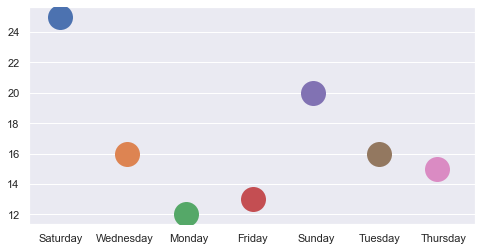

In [87]:
plt.figure(figsize = (8,4))
sns.stripplot(x = cskmatches['Day'].unique(), y =y1, size = 25)  # Matches won

<Figure size 3000x750 with 0 Axes>

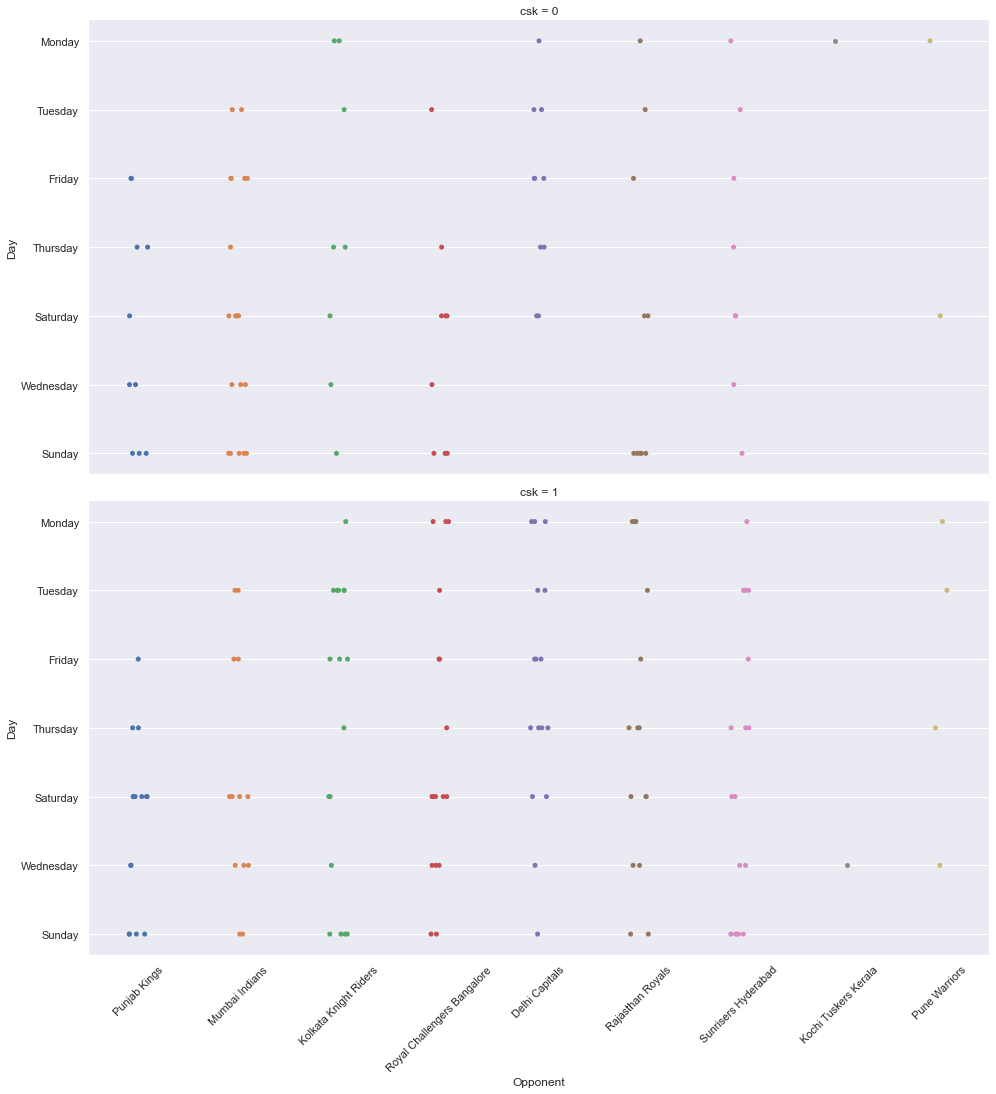

In [110]:
plt.figure(figsize = (20,5), dpi = 150)
sns.catplot(data = cskmatches, x = 'Opponent', y = 'Day', row = 'csk', height = 7, aspect =2)
plt.xticks(rotation = 45);

<Figure size 3000x750 with 0 Axes>

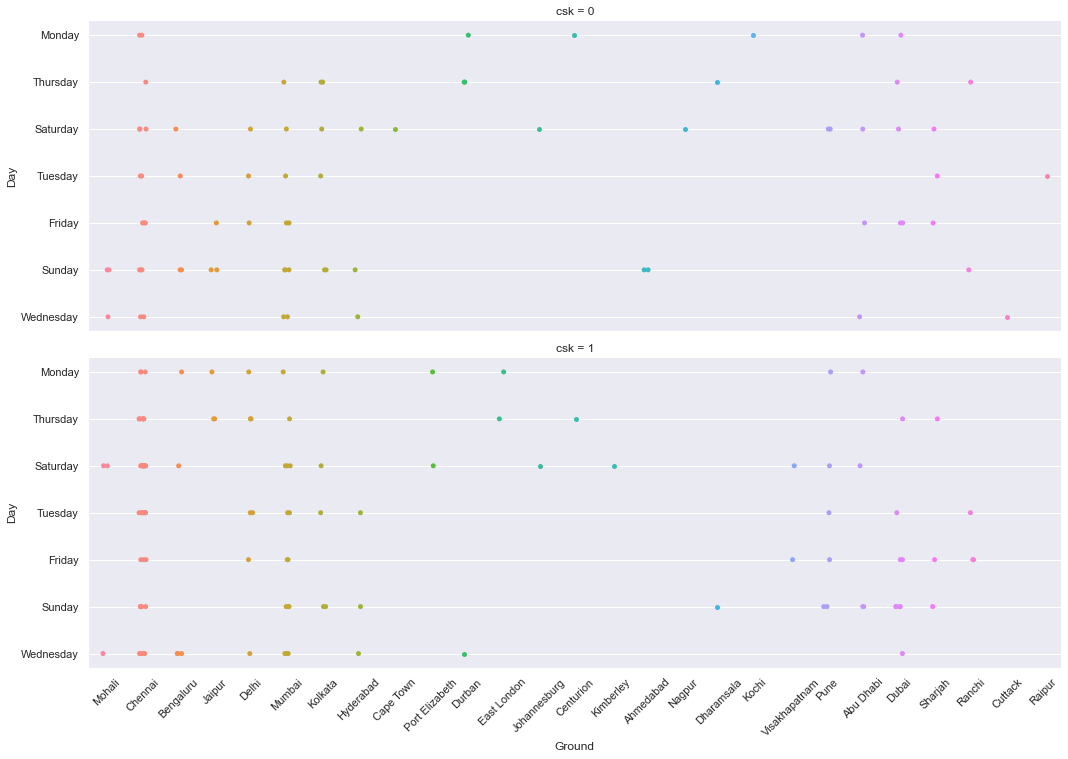

In [122]:
plt.figure(figsize = (20,5), dpi = 150)
sns.catplot(data = cskmatches, x = 'Ground', y = 'Day', row = 'csk', height = 5, aspect = 3)
plt.xticks(rotation = 45);

<Figure size 4000x1000 with 0 Axes>

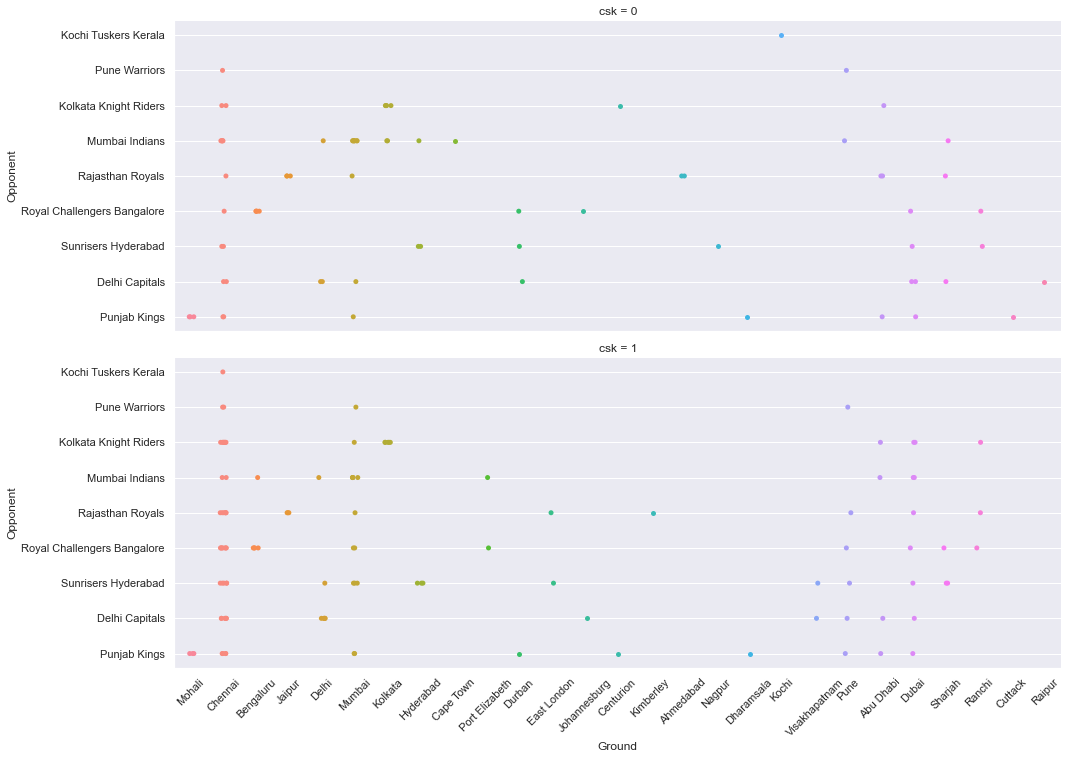

In [119]:
plt.figure(figsize = (20,5), dpi = 200)
sns.catplot(data = cskmatches, x = 'Ground', y = 'Opponent', row = 'csk', height = 5, aspect =3)
plt.xticks(rotation = 45);

In [88]:
cskmatches.to_csv('csk(sql).csv', index = False)

In [89]:
ipldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Match         872 non-null    int32 
 1   Date          872 non-null    object
 2   Teams         872 non-null    object
 3   Ground        872 non-null    object
 4   Result        872 non-null    object
 5   Team1         872 non-null    object
 6   Team2         872 non-null    object
 7   Winner        872 non-null    object
 8   Win by        872 non-null    object
 9   Chasing Team  872 non-null    object
dtypes: int32(1), object(9)
memory usage: 64.8+ KB


In [90]:
ipldf['Date'] = pd.to_datetime(ipldf['Date'])

In [91]:
ipldf.to_csv('ipldf(sql).csv', index = False)

In [92]:
from sqlalchemy import create_engine

In [93]:
ipl_db = create_engine('sqlite:///:memory:')

In [94]:
cskmatches.to_sql(name = 'cskmatches', con = ipl_db)

In [95]:
ipldf.to_sql(name = 'iplt20', con = ipl_db)

In [96]:
pd.read_sql(sql = 'iplt20', con = ipl_db)

,index,Match,Date,Teams,Ground,Result,Team1,Team2,Winner,Win by,Chasing Team
0,0,1,2008-04-18,Royal Challengers Bangalore v Kolkata Knight R...,Bengaluru,Kolkata Knight Riders won by 140 Runs,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140 Runs,Lost
1,1,2,2008-04-19,Punjab Kings v Chennai Super Kings,Mohali,Chennai Super Kings won by 33 Runs,Punjab Kings,Chennai Super Kings,Chennai Super Kings,33 Runs,Lost
2,2,3,2008-04-19,Delhi Capitals v Rajasthan Royals,Delhi,Delhi Capitals won by 9 Wickets,Delhi Capitals,Rajasthan Royals,Delhi Capitals,9 Wickets,Won
3,3,4,2008-04-20,Kolkata Knight Riders v Deccan Chargers,Kolkata,Kolkata Knight Riders won by 5 Wickets,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,5 Wickets,Won
4,4,5,2008-04-20,Mumbai Indians v Royal Challengers Bangalore,Mumbai,Royal Challengers Bangalore won by 5 Wickets,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,5 Wickets,Won
5,5,6,2008-04-21,Rajasthan Royals v Punjab Kings,Jaipur,Rajasthan Royals won by 6 Wickets,Rajasthan Royals,Punjab Kings,Rajasthan Royals,6 Wickets,Won
6,6,7,2008-04-22,Deccan Chargers v Delhi Capitals,Hyderabad,Delhi Capitals won by 9 Wickets,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,9 Wickets,Won
7,7,8,2008-04-23,Chennai Super Kings v Mumbai Indians,Chennai,Chennai Super Kings won by 6 Runs,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,6 Runs,Lost
8,8,9,2008-04-24,Deccan Chargers v Rajasthan Royals,Hyderabad,Rajasthan Royals won by 3 Wickets,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,3 Wickets,Won
9,9,10,2008-04-25,Punjab Kings v Mumbai Indians,Mohali,Punjab Kings won by 66 Runs,Punjab Kings,Mumbai Indians,Punjab Kings,66 Runs,Lost
